<body><div class="alert  alert-info" style="text-align:center">
<b>Adult_Money.csv</b><br>
 this project is made by <strong>Hanan Mo. Alnakhal</strong>
</div>

this Data is a very limited version of the original data set on UCI, I found it on my laptop during the 2023-2024 war <br>
I did this project before at 2021 but could not find it after<br>
So here I'm making a more profissional version

# **SetUp**
<div class="alert-block alert-info">
</div>

## imported libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 ## imported data

In [3]:
ds=pd.read_csv(r"adult.csv",na_values="?")
ds.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Private,110713,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
1,45,Self-emp-not-inc,225456,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,43,Private,118308,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,50,United-States,>50K
3,26,Private,84619,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4,36,Private,447346,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


## colors Dictionary

# **Data Analysis**
<div class="alert-block alert-info">
</div>

## **EDA exploring**
---

### General info

#### getting row information: 

In [5]:
ds.shape

(3803, 15)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3803 non-null   int64 
 1   workclass        3612 non-null   object
 2   fnlwgt           3803 non-null   int64 
 3   education        3803 non-null   object
 4   educational-num  3803 non-null   int64 
 5   marital-status   3803 non-null   object
 6   occupation       3610 non-null   object
 7   relationship     3803 non-null   object
 8   race             3803 non-null   object
 9   gender           3803 non-null   object
 10  capital-gain     3803 non-null   int64 
 11  capital-loss     3803 non-null   int64 
 12  hours-per-week   3803 non-null   int64 
 13  native-country   3741 non-null   object
 14  income           3803 non-null   object
dtypes: int64(6), object(9)
memory usage: 445.8+ KB


In [7]:
ds.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000
mean,40.075204,190118.370497,10.516697,1878.522482,115.553247,41.729161
std,12.995897,104600.743468,2.633380,9998.401297,462.844230,12.293716
min,17.000000,20507.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,119199.000000,9.000000,0.000000,0.000000,40.000000
50%,39.000000,178383.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,236515.000000,13.000000,0.000000,0.000000,48.000000
max,90.000000,981628.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
ds[['age','educational-num','fnlwgt',"capital-gain","capital-loss","hours-per-week"]].corr()

,age,educational-num,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,0.098759,-0.079115,0.073901,0.069046,0.071616
educational-num,0.098759,1.000000,-0.020601,0.137037,0.088748,0.193257
fnlwgt,-0.079115,-0.020601,1.000000,-0.002690,-0.002966,0.003846
capital-gain,0.073901,0.137037,-0.002690,1.000000,-0.046919,0.084970
capital-loss,0.069046,0.088748,-0.002966,-0.046919,1.000000,0.034786
hours-per-week,0.071616,0.193257,0.003846,0.084970,0.034786,1.000000


In [9]:
print("parcentage-> work more than 50 hours per week:",ds[ds["hours-per-week"]>50]["hours-per-week"].count()/ds["hours-per-week"].count()*100)
print("parcentage-> work more than 70 hours per week:",ds[ds["hours-per-week"]>70]["hours-per-week"].count()/ds["hours-per-week"].count()*100)
print("parcentage-> work more than 80 hours per week: %f"%(ds[ds["hours-per-week"]>80]["hours-per-week"].count()/ds["hours-per-week"].count()*100))

parcentage-> work more than 50 hours per week: 13.200105180120957
parcentage-> work more than 70 hours per week: 1.8406521167499343
parcentage-> work more than 80 hours per week: 0.631081


#### plots for distributions and relations: 

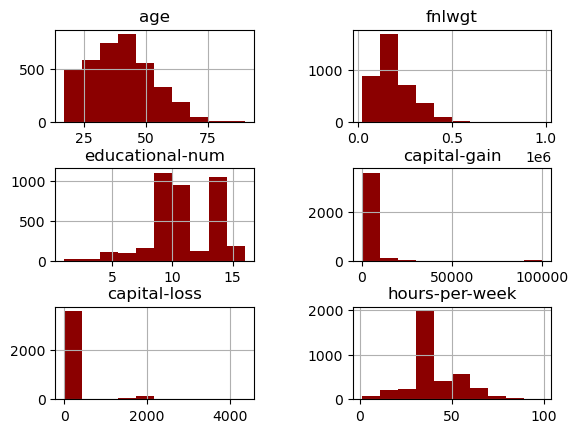

In [10]:
ds.hist(color='darkred');
plt.subplots_adjust(wspace=.5, hspace=.5);

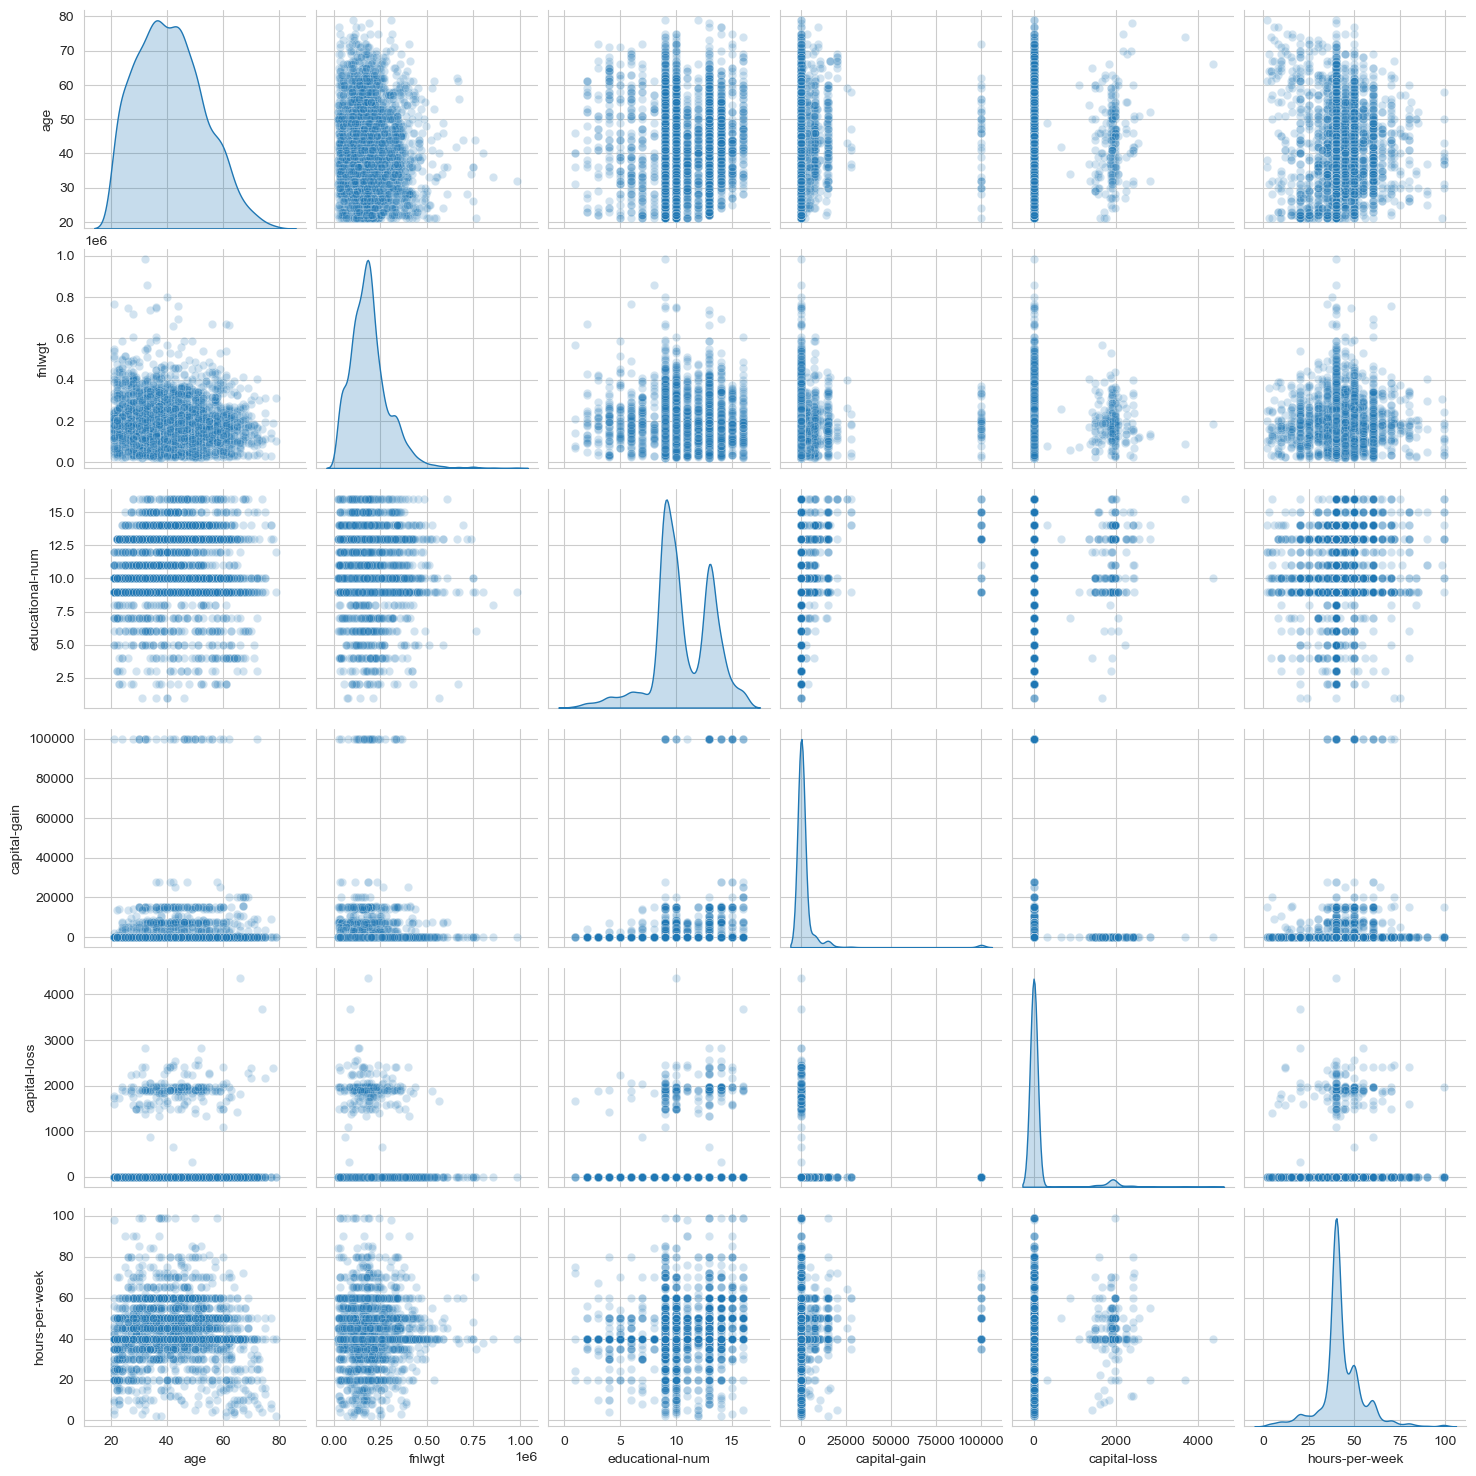

In [11]:
sns.set_style('whitegrid')
sns.pairplot(ds[(ds.age >20)&(ds.age <80)],diag_kind="kde",plot_kws={'alpha': 0.2});

### Missing-Data:

In [12]:
missing=pd.DataFrame({"missing":ds.isnull().sum()})
missing[missing['missing']>0].style.background_gradient(cmap="Reds",subset="missing")

,missing
workclass,191
occupation,193
native-country,62


### Outliers or Noisy Data:
- as we can see in the following plot,there is not any

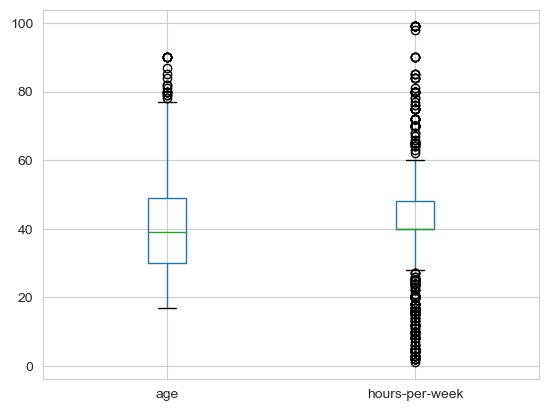

In [13]:
ds[['age','hours-per-week']].boxplot();

### 
---
> ## **Notices:**
> - **there is 3802 record and 15 columns**
> - ### ages are between 17-90
>    - most ages are between(30-49)
> - ### most of the recoreds has got post hightSchool education<br>(high-scoole educational number is -->9)
>    - the ppl who never got to be in school are only 4 ppl none of them gets >50K yearly
> - ### ppl work in an average of (41.7 hours/week)
>    - 75% of ppl work 48 hours or less
>    - only 24% work more than 49 hours
>    - less than 2% work more than 70 hours

> - ### **there are missing data in 3 columns `('workclass','occupation','native-country')`**
> - ## **Droping:**
>   - records: that has missing Data --> `occupation`
>   - columns: 
>       - `fnlwgt` + `capital-loss` +`capital-gain`--> doesn't effict the general "income"
>       - `education` --> is the same as educational-num

> - ## **Main columns:**
>   - Target column: **`income`**
>   - **`age | gender | race | educational-num | workclass | occupation | marital-status | relationship | hours-per-week | native-country`**
>   - `marital-status | relationship`   --> must chose one of them
>   - `workclass | occupation`          --> diciding which one is more important
>   - 
        

## **Data Cleaning:**
---
- dealing with missing Data since there is no Outliers

### Droping:

#### deleting empty records
- `occupation` is important and can't be filled manually + I noteced since the occupation is just the `workclass` but more spicific 
that means that if i droped the records that has missing `occupation` the `workclass` missing would also be droped automatically
- the `native-country` column also have missing values so it will be analised later to fill it with an apropriet values

In [14]:
null_index=ds["occupation"].isnull()
ds.drop(ds.loc[null_index].index,inplace=True)

In [15]:
missing=pd.DataFrame({"missing":ds.isnull().sum()})
missing[missing['missing']>0].style.background_gradient(cmap="Reds",subset="missing")
# by deleting the record that miss the occupation values we deleted the workclass that olso have missing values

,missing
native-country,60


#### deleting unimportant columns

In [16]:
ds.drop(["fnlwgt","capital-gain","capital-loss","education"],axis=1,inplace=True)
ds.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,39,Private,13,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,>50K
1,45,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
2,43,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,>50K
3,26,Private,13,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K
4,36,Private,9,Married-civ-spouse,Sales,Husband,White,Male,50,United-States,>50K


### filling missing Data at `native-country` :


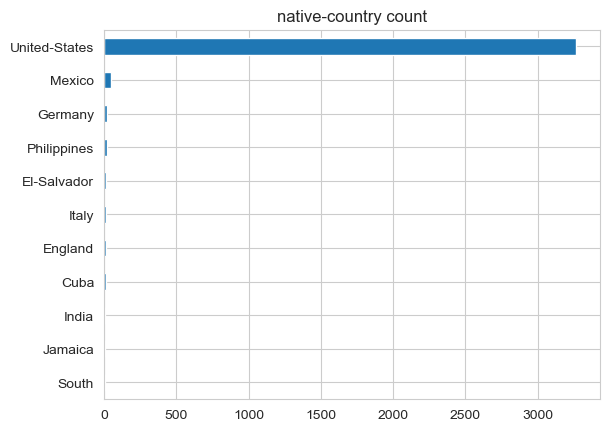

In [17]:
Country=ds['native-country'].value_counts()
Country.sort_values(ascending=False).head(11).sort_values(ascending=True).plot(kind="barh")
plt.title("native-country count");

#### filling missing with "United-States":
- since most of the records are from there as we can see in the previous plot

In [18]:
before = ds.loc[ds['native-country'].isnull()].head()
before

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
146,40,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,40,NaN,>50K
244,50,Private,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,50,NaN,>50K
277,54,Self-emp-inc,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,NaN,>50K
291,46,Self-emp-inc,13,Married-civ-spouse,Sales,Husband,White,Male,42,NaN,>50K
299,42,Private,16,Married-spouse-absent,Other-service,Not-in-family,White,Male,60,NaN,>50K


In [19]:
ds['native-country'].fillna("United-States",inplace=True)
missing=pd.DataFrame({"missing":ds.isnull().sum()})
missing[missing['missing']>0].style.background_gradient(cmap="Reds",subset="missing")

,missing


## **income and hours-per-week :**
---

> there is a positive relationship: **work more get more**

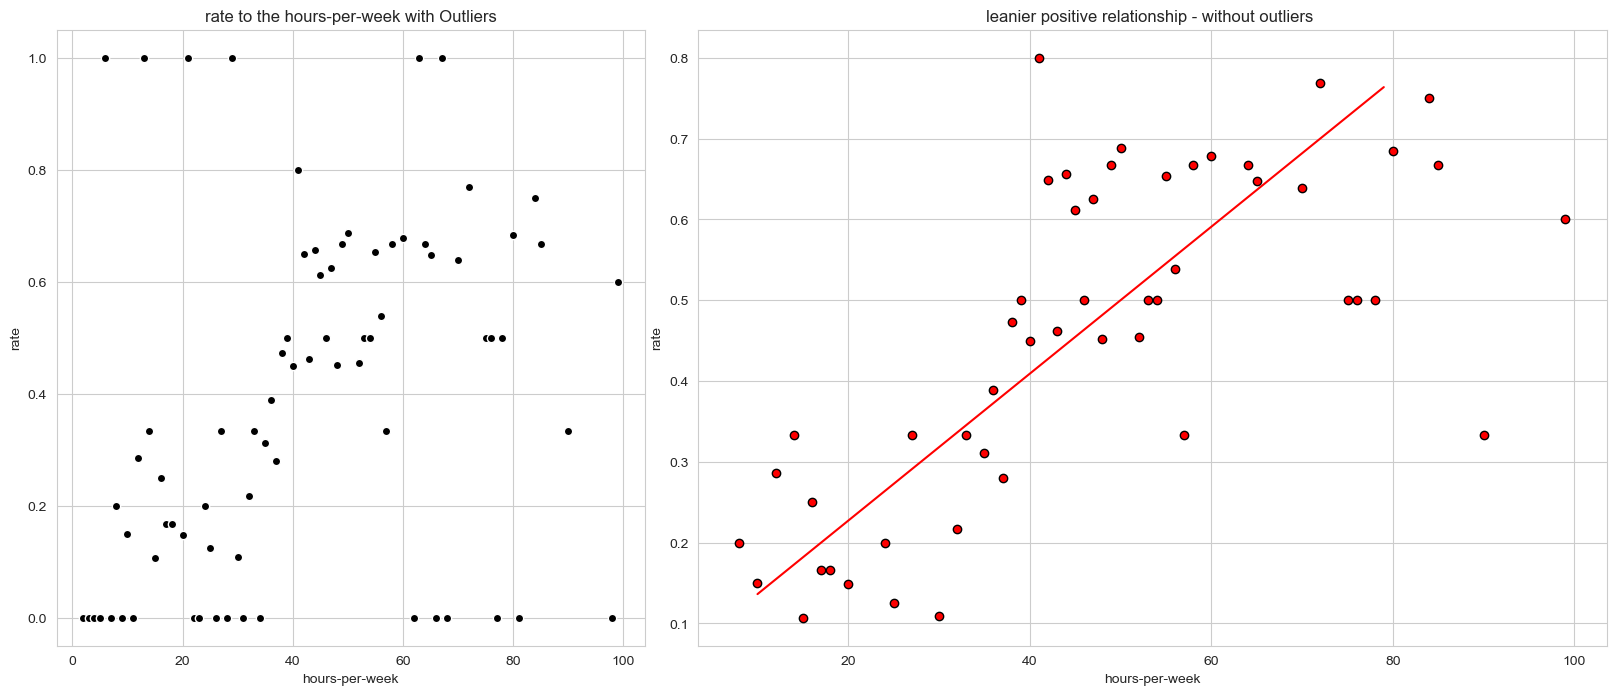

In [20]:
axs=plt.figure(figsize=(20, 8)).subplot_mosaic("""AABBB""")
HperWeek=ds.groupby(['hours-per-week', 'income']).size().unstack().fillna(0)
HperWeek['rate']=HperWeek['>50K']/(HperWeek['>50K']+HperWeek['<=50K'])
mask=(HperWeek['rate']<1)&(HperWeek['rate']>0)
masked=HperWeek[mask]

axs["A"].scatter(x=HperWeek.index,y=HperWeek['rate'],color="black",edgecolors='white')# With outliers
axs["B"].scatter(x=masked.index, y=masked['rate'], color='red',edgecolors='black')# Without outliers
axs['A'].set_ylabel('rate')
axs['A'].set_xlabel('hours-per-week')
axs['A'].set_title('rate to the hours-per-week with Outliers')
axs['B'].set_ylabel('rate')
axs['B'].set_xlabel('hours-per-week')
axs['B'].set_title('leanier positive relationship - without outliers ')
plt.plot(np.arange(10,80),np.arange(15,85)/110,color='red');



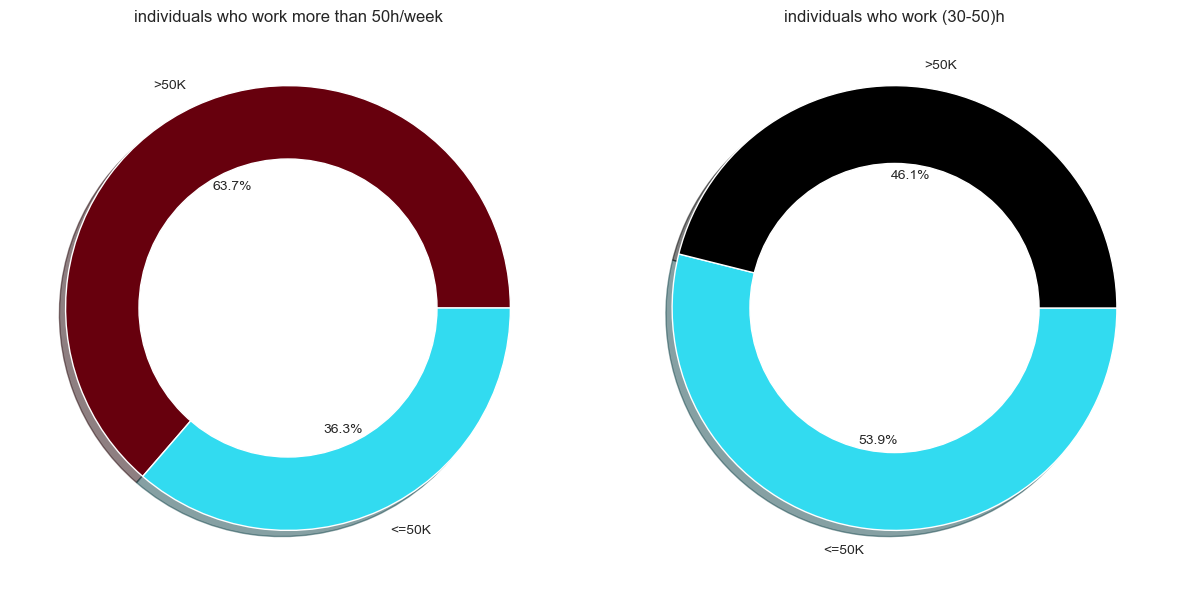

In [21]:
colors=['#67000d','#32DBF0']
axs=plt.figure(figsize=(15, 10)).subplot_mosaic("""AABB
                                   AABB
                                   AABB""")
pplWhoWorkMore=ds[ds['hours-per-week']>50]["income"].value_counts()
mask=(ds['hours-per-week']<50)&(ds['hours-per-week']>30)
avarageWorkH=ds[mask]["income"].value_counts()
axs["A"].pie(pplWhoWorkMore,labels=pplWhoWorkMore.index,colors=colors,shadow=True,autopct='%1.1f%%')
axs["A"].set_title("individuals who work more than 50h/week")
axs['A'].add_artist(plt.Circle((0, 0), 0.67, color='white'));
axs["B"].pie(avarageWorkH,labels=avarageWorkH.index,colors=['#32DBF0','black'],counterclock=False,shadow=True,autopct='%1.1f%%')
axs["B"].set_title("individuals who work (30-50)h");
axs['B'].add_artist(plt.Circle((0, 0), 0.65, color='white'));

## **income and age :**
---

- positive relationship :
        - there is a clear positive relationship as you can see the crean curves up 

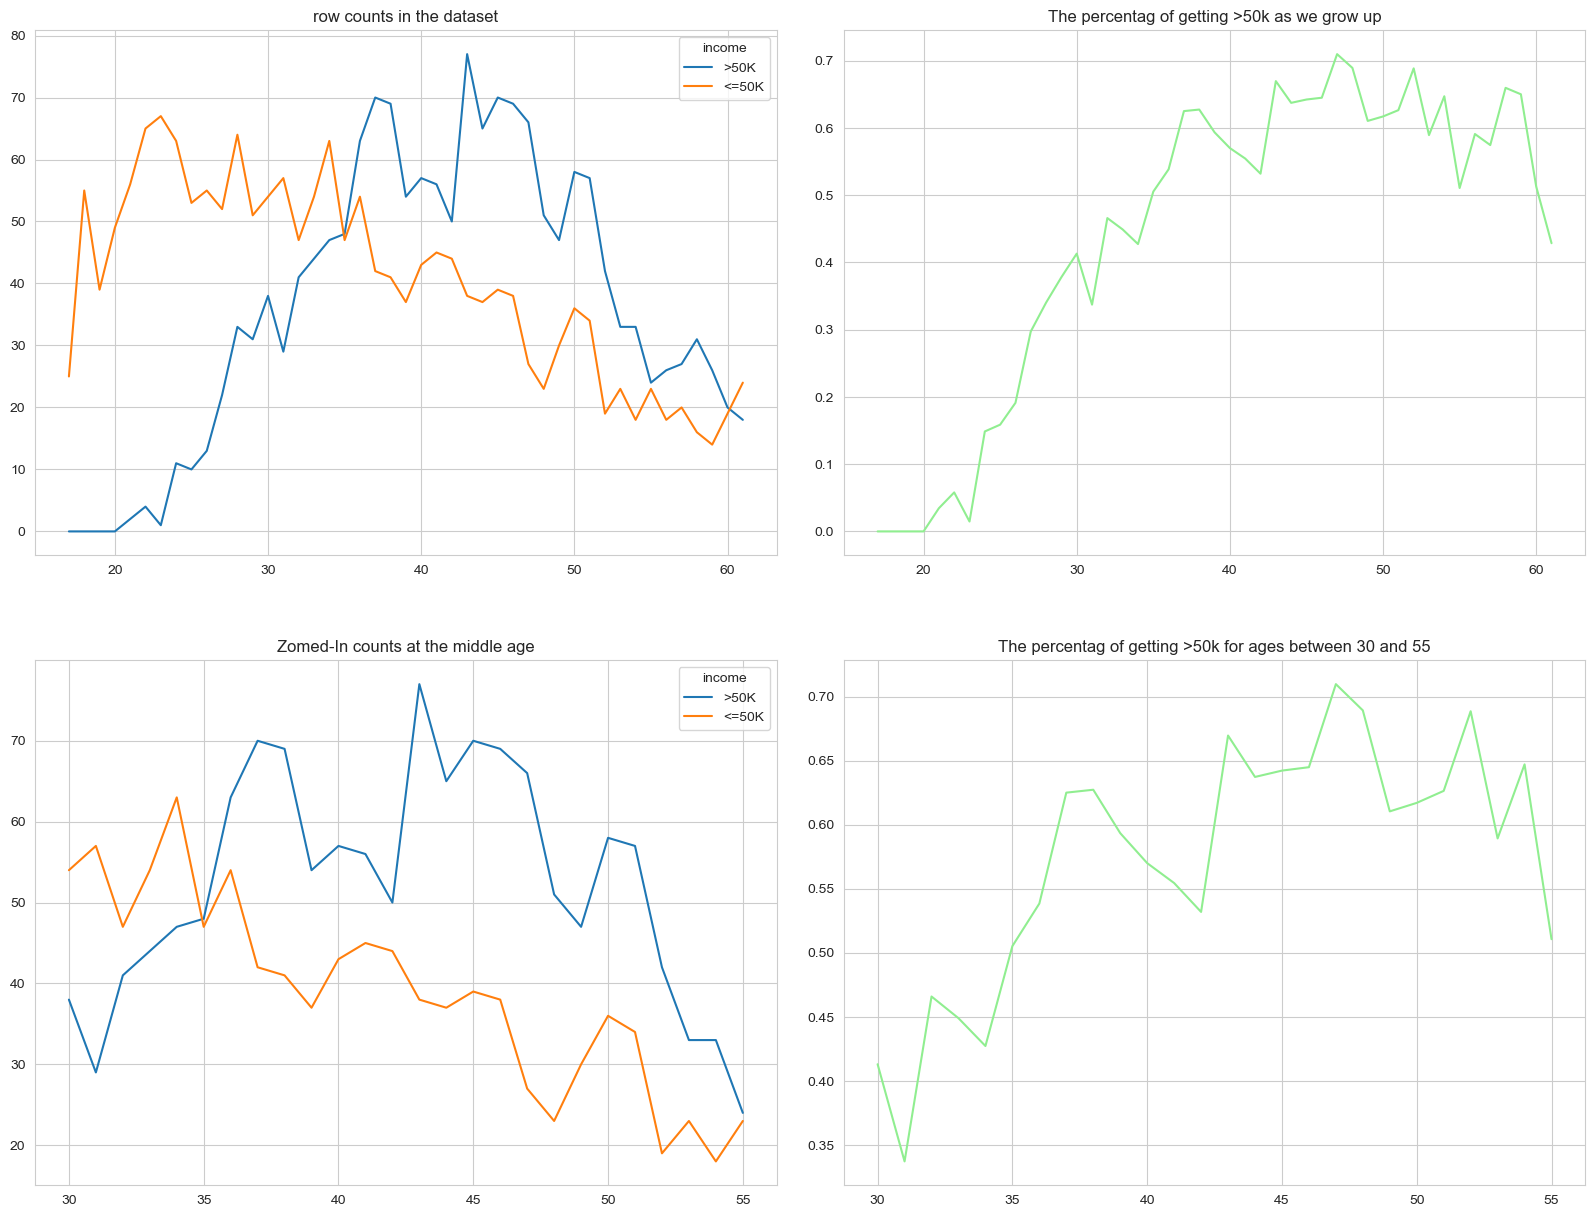

In [22]:
# plt.scatter(ds.age, ds.income, color="#272727", edgecolor='black');
axs=plt.figure(figsize=(20, 15)).subplot_mosaic("""AABB
                                                  CCDD""");
ageRelated=ds.groupby(['age', 'income']).size().unstack()
ageRelated.fillna(0,inplace=True)
ageRelated['rate']=ageRelated['>50K']/(ageRelated['>50K']+ageRelated['<=50K'])
axs['A'].plot(ageRelated.loc['17':'61'][['>50K',"<=50K"]])
axs['A'].legend(title='income',labels=['>50K','<=50K'])
axs["A"].set_title("row counts in the dataset")
axs['B'].plot(ageRelated.loc['17':'61']['rate'],color='lightgreen');
axs["B"].set_title("The percentag of getting >50k as we grow up")
axs['C'].plot(ageRelated.loc['30':'55'][['>50K','<=50K']])
axs['C'].legend(title='income',labels=['>50K','<=50K'])
axs["C"].set_title("Zomed-In counts at the middle age")
axs['D'].plot(ageRelated.loc['30':'55']['rate'],color='lightgreen');
axs["D"].set_title("The percentag of getting >50k for ages between 30 and 55");


## **gender :**
---

In [23]:
GenderDs=ds.groupby(['gender','income',]).size().unstack()

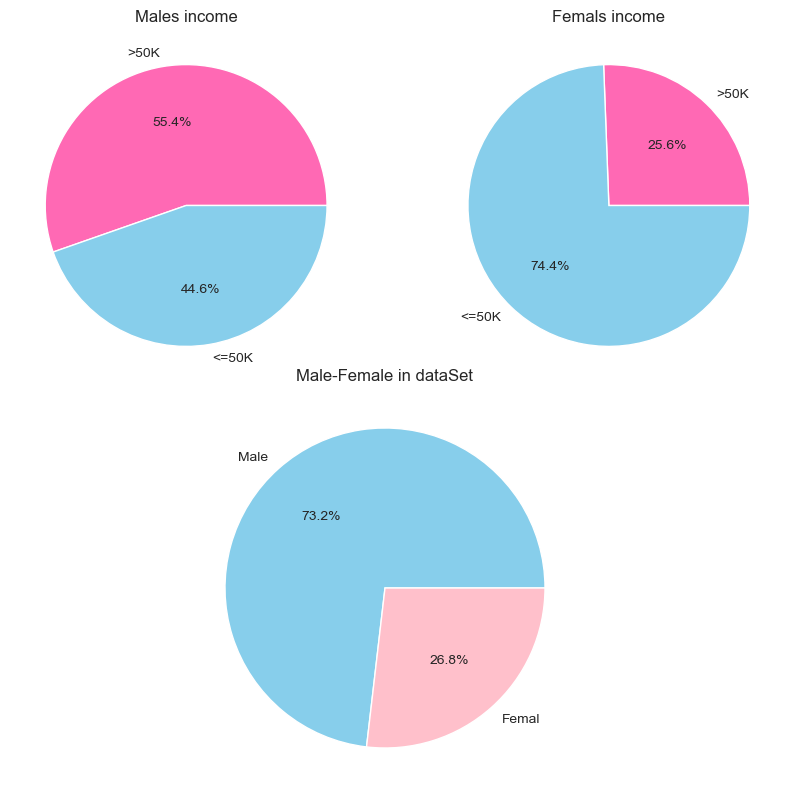

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 15))

axs[0, 1].pie(GenderDs.loc['Female',['>50K','<=50K']],labels=[">50K", "<=50K"], autopct='%1.1f%%', colors=['hotpink','skyblue'])
axs[0, 1].set_title("Femals income")
axs[0, 0].pie(GenderDs.loc['Male',['>50K','<=50K']],labels=[">50K", "<=50K"], autopct='%1.1f%%', colors=['hotpink','skyblue'])
axs[0, 0].set_title("Males income")
axs[1, 0].pie( ds['gender'].value_counts(),labels=["Male", "Femal"], autopct='%1.1f%%', colors=['skyblue','pink'])
axs[1, 0].set_title("Male-Female in dataSet")
axs[1, 1].remove()
axs[1, 0].set_position([0.3, 0.3, 0.4, 0.3])

In [25]:
# [['gender','age',"educational-num","hours-per-week"]]
        # |
#         ^

GenderDs=ds[['gender','age',"educational-num","hours-per-week"]].groupby('gender').mean()
avarageWorkH=ds["hours-per-week"].mean()
GenderDs.columns.name="mean||"
GenderDs


mean||,age,educational-num,hours-per-week
gender,,,
Female,37.525284,10.428277,37.316821
Male,40.761833,10.636123,44.079137


In [26]:
print('-'*50)
print('women get less education than men at average')
print('-'*50)
print('average work hours for records in data set regardless of gender:',avarageWorkH)
print('delta averageWorkHours and the women',GenderDs.loc["Female"]["hours-per-week"]- avarageWorkH)
print('delta averageWorkHours and the men',GenderDs.loc["Male"]["hours-per-week"]- avarageWorkH)
print('-'*50)
print('women work less than average,while men work more')

--------------------------------------------------
women get less education than men at average
--------------------------------------------------
average work hours for records in data set regardless of gender: 42.26398891966759
delta averageWorkHours and the women -4.947167454239313
delta averageWorkHours and the men 1.815147770979891
--------------------------------------------------
women work less than average,while men work more


### **Top occupation based on gender :**

In [27]:
FeOcc=ds[(ds['gender']=='Female')&(ds['income']=='>50K')]['occupation'].value_counts()
FeOcc

Prof-specialty       83
Adm-clerical         60
Exec-managerial      60
Sales                15
Other-service        11
Tech-support          8
Machine-op-inspct     4
Protective-serv       3
Transport-moving      2
Handlers-cleaners     1
Craft-repair          1
Name: occupation, dtype: int64

In [28]:
MaOcc=ds[(ds['gender']=='Male')&(ds['income']=='>50K')]['occupation'].value_counts()
MaOcc

Exec-managerial      390
Prof-specialty       325
Craft-repair         201
Sales                184
Adm-clerical          69
Transport-moving      66
Machine-op-inspct     57
Tech-support          55
Protective-serv       53
Farming-fishing       27
Other-service         19
Handlers-cleaners     16
Name: occupation, dtype: int64

### 
> - only 26% of the data-set is **Females**,while the rest are males
> - more than 55% of the males get more than 50k yearly
> - only 25.6% of Females get more than 50k yearly



> average work hours for records in data set regardless of gender: `42.26398891966759`<br>
> delta averageWorkHours and the women `-4.947167454239313`<br>
> delta averageWorkHours and the men `1.815147770979891`<br>
> women get less education than men at average<br>
> women work less than average,while men work more



## **race:**
---

> - **Asian-Pac-Islander :**
>   - get on average more eductaion than high school, get **"Assoc-voc"** on average
>       - has **50%** chance of getting more than 50K yearly
> - **white :**
>   - get on average more eductaion than high school, get **"some-colllage"** on average
>   - has **49%** chance of getting more than 50K yearly

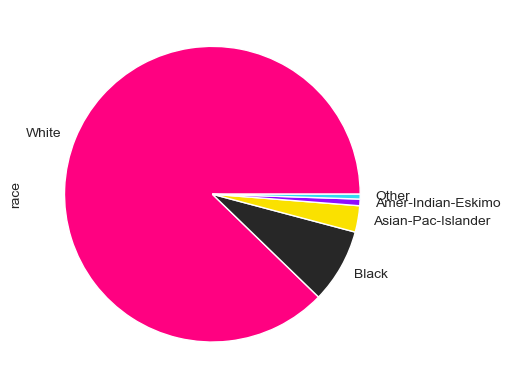

In [29]:
colors = ['#FF0181','#272727','#FAE100' , '#900DFF',"#32DBF0"]
ds['race'].value_counts().plot(kind='pie',colors = colors);

In [30]:
RaceSta=ds.groupby(['race', 'income']).size().unstack().fillna(0)
RaceSta['rate']=RaceSta['>50K']/(RaceSta['>50K']+RaceSta['<=50K'])
RaceSta2=ds.groupby('race')[['age',"educational-num","hours-per-week"]].mean()
RaceSta=RaceSta.join(RaceSta2)
RaceSta

,<=50K,>50K,rate,age,educational-num,hours-per-week
race,,,,,,
Amer-Indian-Eskimo,20,6,0.230769,34.884615,9.115385,40.307692
Asian-Pac-Islander,51,53,0.509615,37.096154,11.346154,40.750000
Black,210,83,0.283276,37.839590,9.750853,40.221843
Other,15,4,0.210526,32.947368,9.315789,40.210526
White,1604,1564,0.493687,40.257576,10.651515,42.530934


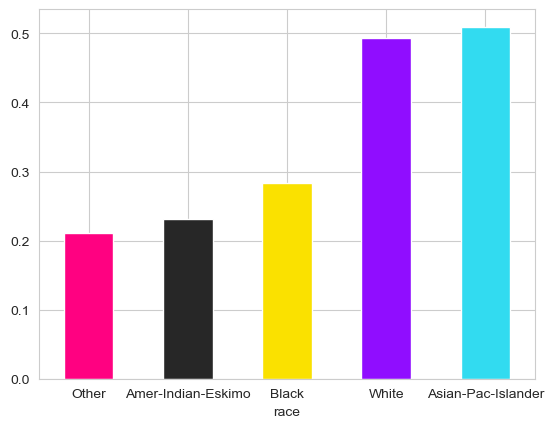

In [31]:
RaceSta['rate'].sort_values().plot(kind='bar',color=colors)
plt.xticks(rotation=0);

## **education:**
---

> - The more education you have, give you a real chance up to 70% to get more than 50k yearly
> - most ppl in the data-set has got education up to high-school grade, only 30% of them gets >50k yearly
> - 80% of ppl who have a Doctorate degree gets >50k a year

In [32]:
education={
     1:'Preschool',
     2:'1st-4th',
     3:'5th-6th',
     4:'7th-8th',
     5:'9th',
     6:'10th',
     7:'11th',
     8:'12th',
     9:'HS-grad',
     10:'Some-college',
     11:'Assoc-voc',
     12:'Assoc-acdm',
     13:'Bachelors',
     14:'Masters',
     15:'Prof-school',
     16:'Doctorate'}

Text(0.5, 0, '')

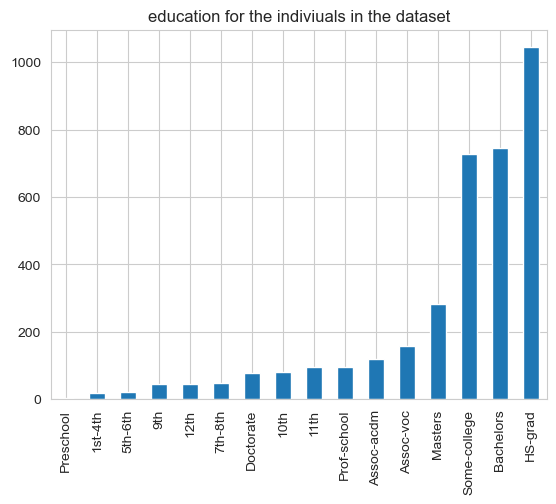

In [33]:
ds['educational-num']=ds['educational-num'].apply(lambda x:education[x])
ds['educational-num'].value_counts().sort_values().plot(kind='bar');
plt.title('education for the indiviuals in the dataset')
plt.xlabel("")

C:\Users\Star\AppData\Local\Temp\ipykernel_904\957521756.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edu=ds.groupby('educational-num').mean().join(ds.groupby(['educational-num','income']).size().unstack().fillna(0))


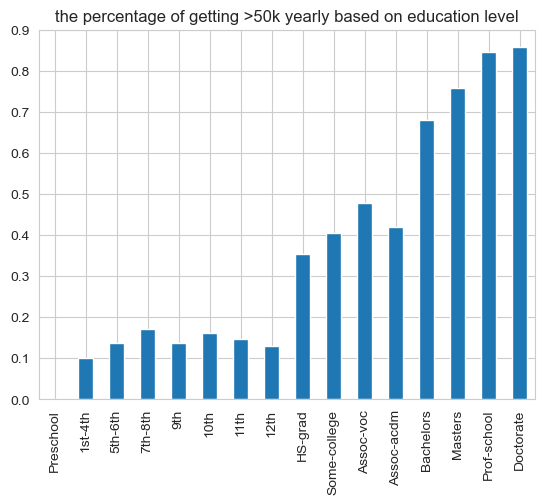

In [34]:

edu=ds.groupby('educational-num').mean().join(ds.groupby(['educational-num','income']).size().unstack().fillna(0))
edu["rate"]=edu['>50K']/(edu['<=50K']+edu['>50K'])
edu.loc[list(education.values())]['rate'].plot.bar();
plt.title('the percentage of getting >50k yearly based on education level')
plt.xlabel("");

In [35]:
def coding(x):
    dict={}
    for i,name in tuple(education.items()):
        dict[name]=i
    return dict[x]
ds['educational-num']=ds['educational-num'].apply(lambda x: coding(x))

## **work class -> occupation** ?
---

- ***occupation is more important*** than workclass if had to chose between them occupation is much detalid and has more classes than workclass classes
- but I decided to choose **both** when making the ML modul

In [36]:
ds['occupation'].value_counts()

Exec-managerial      625
Prof-specialty       604
Craft-repair         460
Sales                416
Adm-clerical         374
Other-service        281
Machine-op-inspct    201
Transport-moving     181
Handlers-cleaners    135
Tech-support         125
Farming-fishing      103
Protective-serv       98
Priv-house-serv        6
Armed-Forces           1
Name: occupation, dtype: int64

In [37]:
ds['workclass'].value_counts()

Private             2579
Self-emp-not-inc     302
Local-gov            260
State-gov            178
Self-emp-inc         161
Federal-gov          129
Without-pay            1
Name: workclass, dtype: int64

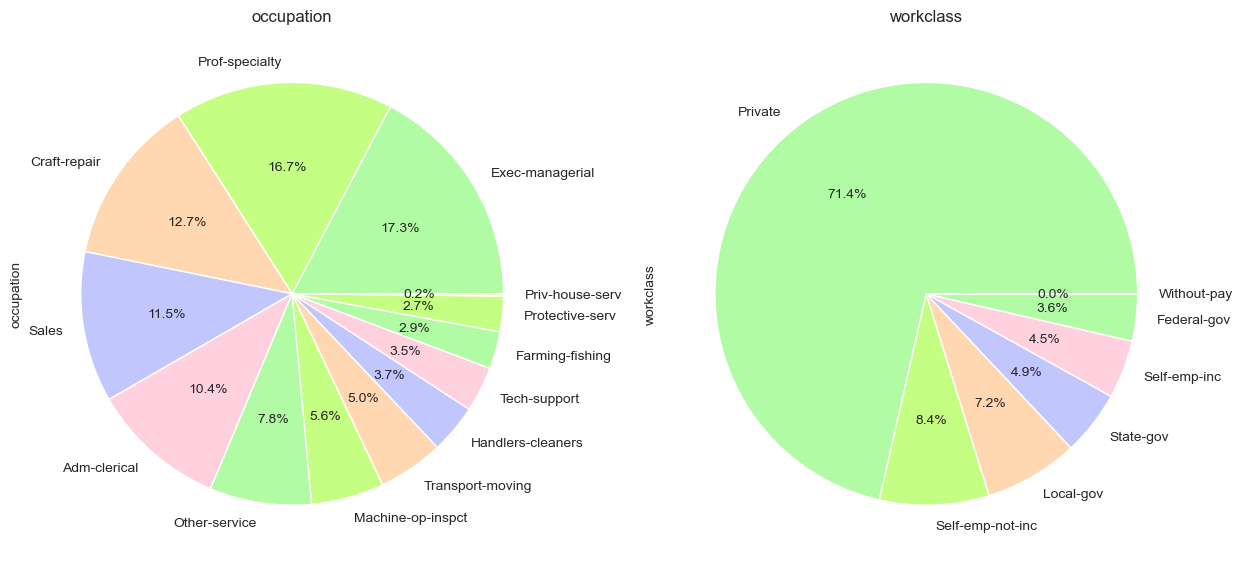

In [38]:
fig=plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
ds['occupation'].value_counts().head(13).plot.pie(autopct='%1.1f%%',colors=list(colorsDict.values())[496:501])
plt.title('occupation');
plt.subplot(1,2,2)
ds['workclass'].value_counts().plot.pie(autopct='%1.1f%%',colors=list(colorsDict.values())[496:501])
plt.title('workclass');

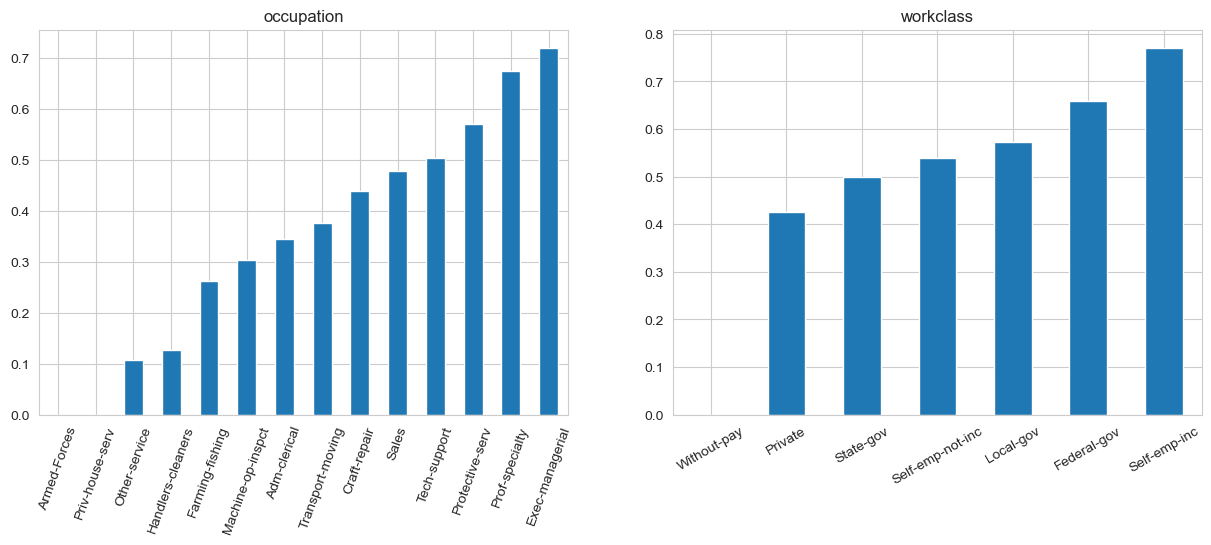

In [39]:
occ=ds.groupby(['occupation','income']).size().unstack().fillna(0).join(ds[['age','educational-num','hours-per-week','occupation']].groupby('occupation').mean())
occ['rate']=occ['>50K']/(occ['>50K']+occ['<=50K'])
workC=ds.groupby(['workclass','income']).size().unstack().fillna(0).join(ds[['age','educational-num','hours-per-week','workclass']].groupby('workclass').mean())
workC['rate']=workC['>50K']/(workC['>50K']+workC['<=50K'])
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
occ['rate'].sort_values().plot.bar()
plt.title('occupation')
plt.xlabel('')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
workC['rate'].sort_values().plot.bar()
plt.title('workclass')
plt.xlabel('');
plt.xticks(rotation=30);

### **occupation**
---

In [40]:
occ.columns.name='mean'
occ=occ.sort_values(by='rate',ascending=False)
occ

mean,<=50K,>50K,age,educational-num,hours-per-week,rate
occupation,,,,,,
Exec-managerial,175.0,450.0,43.051200,11.806400,45.996800,0.720000
Prof-specialty,196.0,408.0,42.201987,13.223510,43.769868,0.675497
Protective-serv,42.0,56.0,39.357143,10.561224,42.908163,0.571429
Tech-support,62.0,63.0,39.440000,11.264000,40.112000,0.504000
Sales,217.0,199.0,39.692308,10.622596,42.548077,0.478365
Craft-repair,258.0,202.0,40.415217,9.163043,43.073913,0.439130
Transport-moving,113.0,68.0,39.204420,8.955801,44.624309,0.375691
Adm-clerical,245.0,129.0,38.748663,10.275401,38.254011,0.344920
Machine-op-inspct,140.0,61.0,37.487562,8.641791,41.069652,0.303483


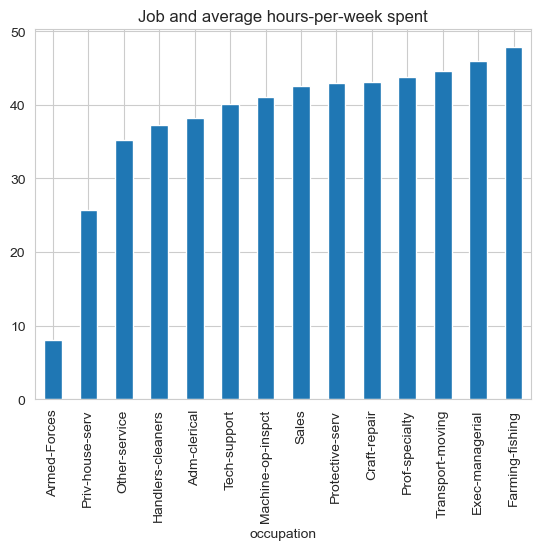

In [41]:
occ['hours-per-week'].sort_values().plot.bar();plt.title('Job and average hours-per-week spent');

#### gender-occupation income:

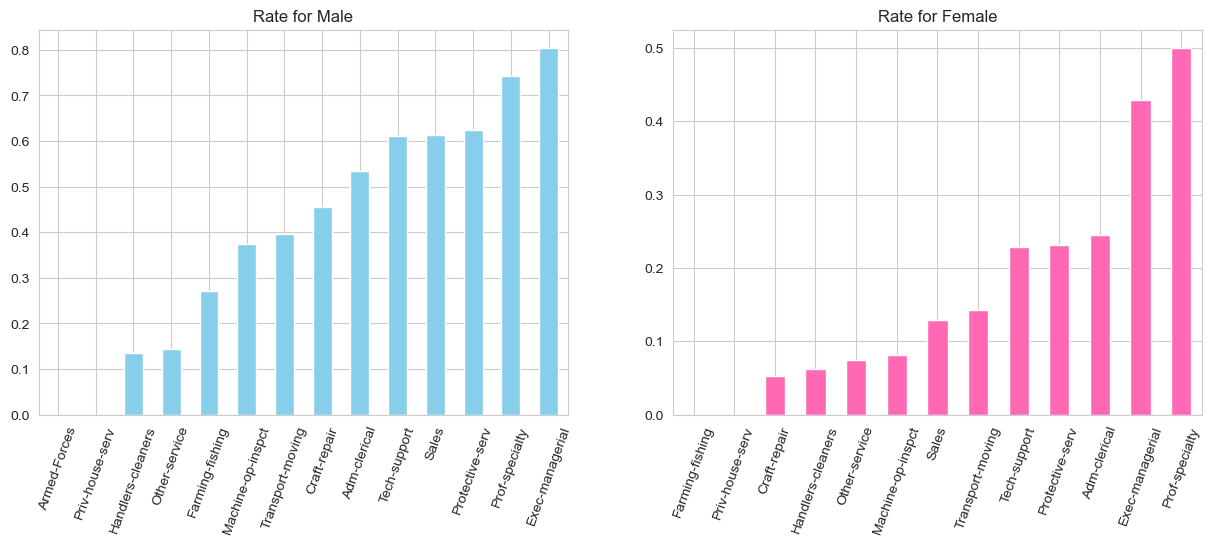

In [42]:
occF=ds[ds['gender']=='Female'].groupby(['occupation','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Female'][['age','educational-num','hours-per-week','occupation']].groupby('occupation').mean())
occF['rate']=occF['>50K']/(occF['>50K'] + occF['<=50K'])
occF=occF.sort_values(by='rate',ascending=False)
occM=ds[ds['gender']=='Male'].groupby(['occupation','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Male'][['age','educational-num','hours-per-week','occupation']].groupby('occupation').mean())
occM['rate']=occM['>50K']/(occM['>50K'] + occM['<=50K'])
occM=occM.sort_values(by='rate',ascending=False)
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
occM['rate'].sort_values().plot.bar(color='skyblue')
plt.title('Rate for Male')
plt.xlabel('')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
occF['rate'].sort_values().plot.bar(color='hotpink')
plt.title('Rate for Female')
plt.xlabel('');
plt.xticks(rotation=70);


In [43]:
occF

,<=50K,>50K,age,educational-num,hours-per-week,rate
occupation,,,,,,
Prof-specialty,83.0,83.0,39.686747,12.993976,39.674699,0.500000
Exec-managerial,80.0,60.0,41.614286,11.407143,42.150000,0.428571
Adm-clerical,185.0,60.0,38.514286,10.130612,37.171429,0.244898
Protective-serv,10.0,3.0,34.076923,10.307692,39.923077,0.230769
Tech-support,27.0,8.0,36.400000,11.000000,39.142857,0.228571
Transport-moving,12.0,2.0,33.714286,9.642857,39.071429,0.142857
Sales,101.0,15.0,33.163793,9.913793,34.612069,0.129310
Machine-op-inspct,45.0,4.0,35.061224,8.428571,36.244898,0.081633
Other-service,137.0,11.0,34.885135,8.763514,32.837838,0.074324


In [44]:
occM

,<=50K,>50K,age,educational-num,hours-per-week,rate
occupation,,,,,,
Exec-managerial,95.0,390.0,43.465979,11.921649,47.107216,0.804124
Prof-specialty,113.0,325.0,43.155251,13.310502,45.321918,0.742009
Protective-serv,32.0,53.0,40.164706,10.600000,43.364706,0.623529
Sales,116.0,184.0,42.216667,10.896667,45.616667,0.613333
Tech-support,35.0,55.0,40.622222,11.366667,40.488889,0.611111
Adm-clerical,60.0,69.0,39.193798,10.550388,40.310078,0.534884
Craft-repair,240.0,201.0,40.598639,9.165533,43.208617,0.455782
Transport-moving,101.0,66.0,39.664671,8.898204,45.089820,0.395210
Machine-op-inspct,95.0,57.0,38.269737,8.710526,42.625000,0.375000


###
> ### **outComes:**
>   **note:***this info is not generlized and it's just based on the current data*
>- **Exec-managerial** jobs has the highest rate of getting more then 50k yearly which is **72%** :
>   - ppl who work in this occupation has the seconed highst education gaind (they went to collage or gaind Assoc-voc or Assoc-acdm)
>   - have the highest age average between all of the occupations (43years)
>   - have the second highest average work hours-per-week ( ≈ 46hours-per-week)
>- **Prof-specialty** the highst education between all of the occupation:
>   - most of them got bachlors degree and some of them even got to have masters and Doctorate
>   - they work(≈44 hours-per-week) which is higher than average
>- ### The highest Top5 occupations based on rate:
>   - gaind more education than the others 
>   - has more critical changes in the orgnization they work with
>   - 4 out of 5 are jobs at office
>- ### based on gender:
>   - women gain rate based on the occupation is lower than men in the same occupation
>       - according to the data : women work "much" less houre p week 
>- #### Top10 occupations for each gender:
>   #sorted bassed on the highest rate of getting more than 50k a year
>     | num | ForFemales| ForMales |
>     | :---: | :---: | :---|
>     |1 | Prof-specialty | Exec-managerial|
>     |2 | Exec-managerial | Prof-specialty|
>     |3 | Adm-clerical | Protective-serv|
>     |4 | Protective-serv | Sales|
>     |5 | Tech-support | Tech-support|
>     |6 | Transport-moving | Adm-clerical|
>     |7 | Sales | Craft-repair|
>     |8 | Machine-op-inspct | Transport-moving|
>     |9 | Other-servic | Machine-op-inspct|
>     |10 | Other-servic | Farming-fishing|


### **Work-Class**
---

In [45]:
workC.columns.name='mean'
workC=workC.sort_values(by='rate',ascending=False)
workC

mean,<=50K,>50K,age,educational-num,hours-per-week,rate
workclass,,,,,,
Self-emp-inc,37.0,124.0,46.391304,11.329193,50.416149,0.770186
Federal-gov,44.0,85.0,43.046512,11.403101,41.868217,0.658915
Local-gov,111.0,149.0,42.619231,11.446154,41.461538,0.573077
Self-emp-not-inc,139.0,163.0,45.284768,10.817881,44.980132,0.539735
State-gov,89.0,89.0,42.747191,11.983146,42.612360,0.500000
Private,1479.0,1100.0,38.217914,10.280729,41.523846,0.426522
Without-pay,1.0,0.0,62.000000,10.000000,16.000000,0.000000


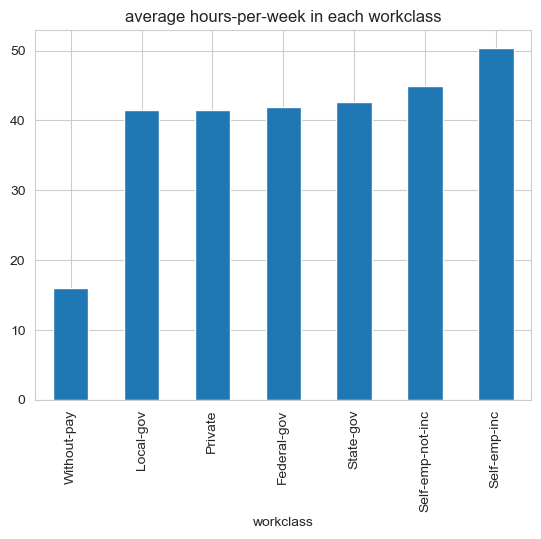

In [46]:
workC['hours-per-week'].sort_values().plot.bar();plt.title('average hours-per-week in each workclass');

#### gender-WorkClass income:

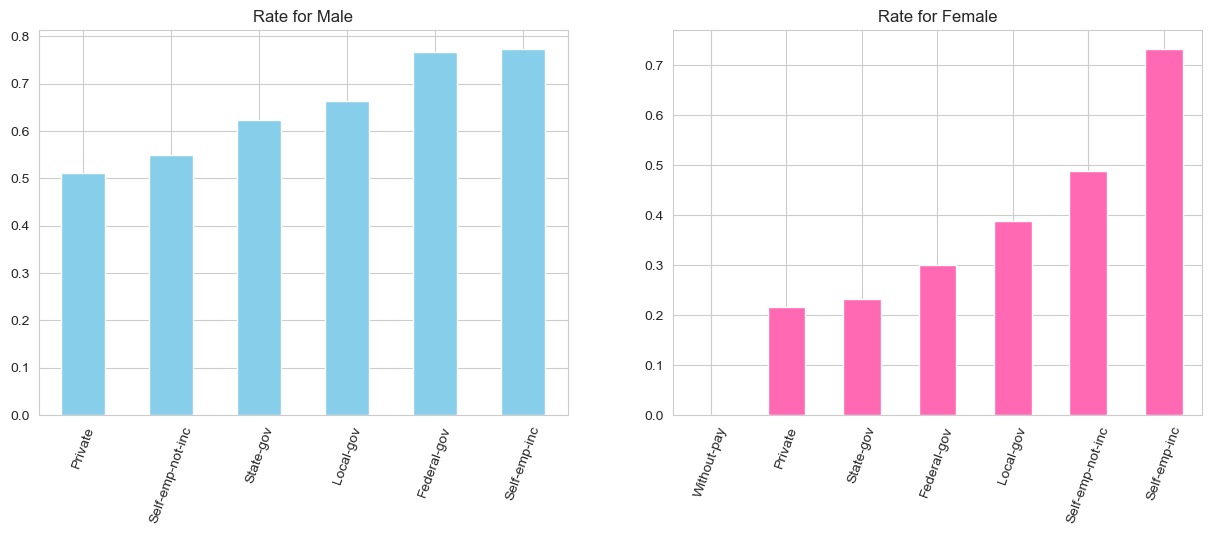

In [47]:
workCF=ds[ds['gender']=='Female'].groupby(['workclass','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Female'][['age','educational-num','hours-per-week','workclass']].groupby('workclass').mean())
workCF['rate']=workCF['>50K']/(workCF['>50K'] + workCF['<=50K'])
workCF=workCF.sort_values(by='rate',ascending=False)
workCM=ds[ds['gender']=='Male'].groupby(['workclass','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Male'][['age','educational-num','hours-per-week','workclass']].groupby('workclass').mean())
workCM['rate']=workCM['>50K']/(workCM['>50K'] + workCM['<=50K'])
workCM=workCM.sort_values(by='rate',ascending=False)
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
workCM['rate'].sort_values().plot.bar(color='skyblue')
plt.title('Rate for Male')
plt.xlabel('')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
workCF['rate'].sort_values().plot.bar(color='hotpink')
plt.title('Rate for Female')
plt.xlabel('');
plt.xticks(rotation=70);

In [48]:
workCF

,<=50K,>50K,age,educational-num,hours-per-week,rate
workclass,,,,,,
Self-emp-inc,4.0,11.0,51.000000,11.666667,45.266667,0.733333
Self-emp-not-inc,24.0,23.0,44.659574,11.255319,36.872340,0.489362
Local-gov,52.0,33.0,42.388235,12.058824,40.552941,0.388235
Federal-gov,21.0,9.0,41.300000,10.966667,41.266667,0.300000
State-gov,43.0,13.0,42.446429,11.250000,39.446429,0.232143
Private,576.0,159.0,35.669388,10.077551,36.514286,0.216327
Without-pay,1.0,0.0,62.000000,10.000000,16.000000,0.000000


In [49]:
workCM

,<=50K,>50K,age,educational-num,hours-per-week,rate
workclass,,,,,,
Self-emp-inc,33,113,45.917808,11.294521,50.945205,0.773973
Federal-gov,23,76,43.575758,11.535354,42.050505,0.767677
Local-gov,59,116,42.731429,11.148571,41.902857,0.662857
State-gov,46,76,42.885246,12.319672,44.065574,0.622951
Self-emp-not-inc,115,140,45.400000,10.737255,46.474510,0.549020
Private,903,941,39.233731,10.361714,43.520607,0.510304


###
> ### **outComes:**
>   **note:***this info is not generlized and it's just based on the current data*
>- **Self-emp-inc** jobs has the highest rate of getting more then 50k yearly which is **77%** :
>   - have the highest average work hours-per-week ( ≈ 50.5 hours-per-week)
>- **Federal-gov** the second highst rate:
>   - most of them got Some collage or more
>   - they work(≈42 hours-per-week) 7hours a day for 6 day 
>- **Private**
>   - has the lowest rate of getting more than 50K yearly (42%)
>   - most records in this data Set work in private  
>- ### based on gender:
>   - **women** :<br>
>        gain rate based on the work-class is lower than men in the same work-class, but in **self-emp-inc** the rate goes up to **73%** which is OK compared to other workclasses
>   - **men** :<br>
>       - rate is above 50% foe all workClasses
>       - **Top 3 work-classes** based on rate :
>
>           | - Self-emp-inc |   77% |
>           | :---:|:---:|    
>           |**- Federal-gov**  |   **76%** |
>           |**- Local-gov**    |   **66%** |


## **relationship/marital-status**
---

In [50]:
ds['marital-status'].value_counts()

Married-civ-spouse       2115
Never-married             895
Divorced                  411
Separated                  83
Widowed                    67
Married-spouse-absent      35
Married-AF-spouse           4
Name: marital-status, dtype: int64

In [51]:
ds['relationship'].value_counts()

Husband           1872
Not-in-family      774
Own-child          373
Unmarried          300
Wife               218
Other-relative      73
Name: relationship, dtype: int64

In [52]:
maritalStatus= ds.groupby(['marital-status','income']).size().unstack().fillna(0)
maritalStatus['rate'] = maritalStatus['>50K']/(maritalStatus['>50K']+maritalStatus['<=50K'])
maritalStatus=ds[["age","educational-num","hours-per-week","marital-status"]].groupby('marital-status').mean().join(maritalStatus)
maritalStatus.sort_values(by='rate',ascending=False)


,age,educational-num,hours-per-week,<=50K,>50K,rate
marital-status,,,,,,
Married-AF-spouse,31.000000,11.000000,40.500000,0.0,4.0,1.000000
Married-civ-spouse,43.167376,10.833570,44.339480,667.0,1448.0,0.684634
Divorced,43.340633,10.406326,42.311436,304.0,107.0,0.260341
Widowed,56.373134,9.597015,34.940299,51.0,16.0,0.238806
Married-spouse-absent,40.371429,9.171429,40.771429,28.0,7.0,0.200000
Separated,40.915663,9.771084,41.662651,70.0,13.0,0.156627
Never-married,29.264804,10.263687,38.007821,780.0,115.0,0.128492


In [53]:
relation= ds.groupby(['relationship','income']).size().unstack().fillna(0)
relation['rate'] = relation['>50K']/(relation['>50K']+relation['<=50K'])
relation=ds[["age","educational-num","hours-per-week","relationship"]].groupby('relationship').mean().join(relation)
relation.sort_values(by='rate',ascending=False)

,age,educational-num,hours-per-week,<=50K,>50K,rate
relationship,,,,,,
Husband,43.732372,10.847756,45.221688,578,1294,0.691239
Wife,39.683486,11.009174,37.435780,68,150,0.688073
Not-in-family,38.445736,10.755814,42.224806,572,202,0.260982
Unmarried,40.156667,10.043333,40.146667,259,41,0.136667
Other-relative,32.493151,9.027397,37.561644,67,6,0.082192
Own-child,24.986595,9.359249,32.946381,356,17,0.045576


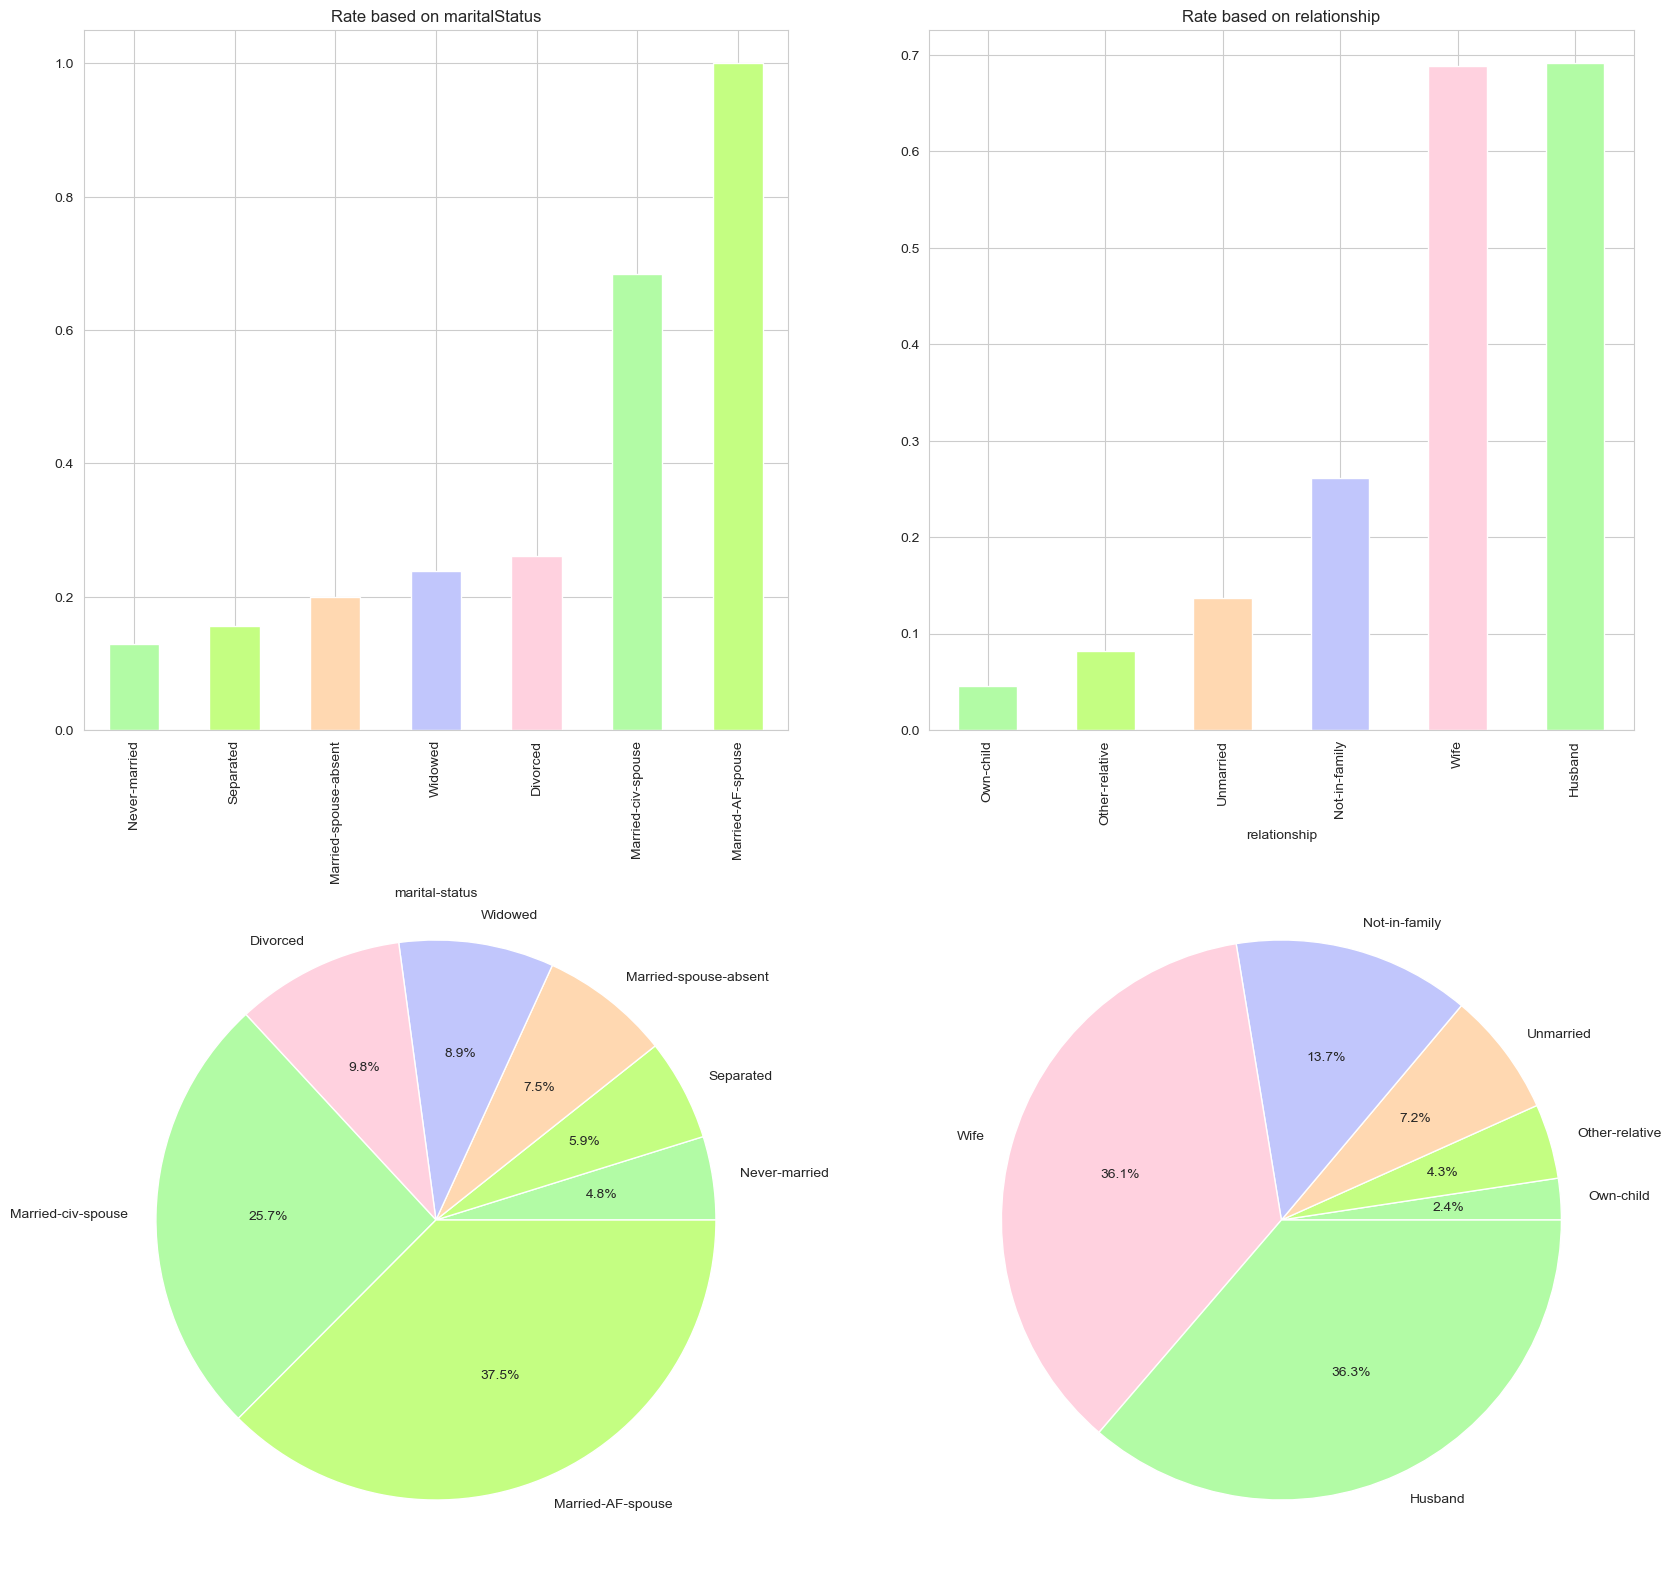

In [54]:
fig=plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
maritalStatus.rate.sort_values().plot.bar(color=list(colorsDict.values())[496:501])
plt.title('Rate based on maritalStatus')
plt.subplot(2,2,2)
relation.rate.sort_values().plot.bar(color=list(colorsDict.values())[496:501])
plt.title('Rate based on relationship')
plt.subplot(2,2,3)
maritalStatus.rate.sort_values().plot.pie(autopct='%1.1f%%',colors=list(colorsDict.values())[496:501])
plt.ylabel('')
plt.subplot(2,2,4)
relation.rate.sort_values().plot.pie(autopct='%1.1f%%',colors=list(colorsDict.values())[496:501])
plt.ylabel('');

### **relationship:**
---

In [55]:
relation=relation.sort_values(by='rate',ascending=False)
relation

,age,educational-num,hours-per-week,<=50K,>50K,rate
relationship,,,,,,
Husband,43.732372,10.847756,45.221688,578,1294,0.691239
Wife,39.683486,11.009174,37.435780,68,150,0.688073
Not-in-family,38.445736,10.755814,42.224806,572,202,0.260982
Unmarried,40.156667,10.043333,40.146667,259,41,0.136667
Other-relative,32.493151,9.027397,37.561644,67,6,0.082192
Own-child,24.986595,9.359249,32.946381,356,17,0.045576


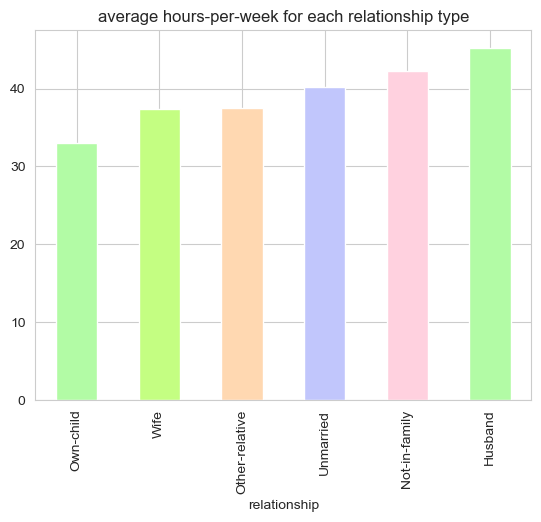

In [56]:
relation['hours-per-week'].sort_values().plot.bar(color=list(colorsDict.values())[496:501])
plt.title('average hours-per-week for each relationship type');

#### **gender and relationship income :**
--- 

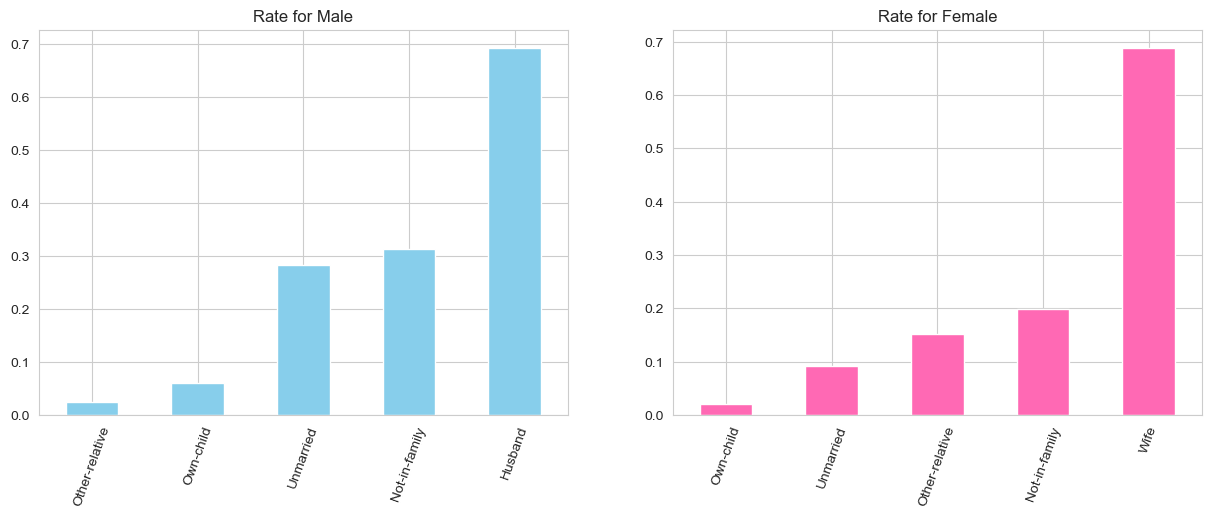

In [57]:
relationF=ds[ds['gender']=='Female'].groupby(['relationship','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Female'][['age','educational-num','hours-per-week','relationship']].groupby('relationship').mean())
relationF['rate']=relationF['>50K']/(relationF['>50K'] + relationF['<=50K'])
relationF=relationF.sort_values(by='rate',ascending=False)
relationM=ds[ds['gender']=='Male'].groupby(['relationship','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Male'][['age','educational-num','hours-per-week','relationship']].groupby('relationship').mean())
relationM['rate']=relationM['>50K']/(relationM['>50K'] + relationM['<=50K'])
relationM=relationM.sort_values(by='rate',ascending=False)
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
relationM['rate'].sort_values().plot.bar(color='skyblue')
plt.title('Rate for Male')
plt.xlabel('')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
relationF['rate'].sort_values().plot.bar(color='hotpink')
plt.title('Rate for Female')
plt.xlabel('');
plt.xticks(rotation=70);

In [58]:
relationF

,<=50K,>50K,age,educational-num,hours-per-week,rate
relationship,,,,,,
Wife,68,150,39.683486,11.009174,37.435780,0.688073
Not-in-family,279,69,39.589080,10.885057,39.853448,0.198276
Other-relative,28,5,36.727273,9.848485,35.272727,0.151515
Unmarried,208,21,40.842795,9.960699,39.213974,0.091703
Own-child,138,3,23.893617,9.297872,28.269504,0.021277


In [59]:
relationM

,<=50K,>50K,age,educational-num,hours-per-week,rate
relationship,,,,,,
Husband,578,1294,43.732372,10.847756,45.221688,0.691239
Not-in-family,293,133,37.511737,10.650235,44.161972,0.312207
Unmarried,51,20,37.943662,10.309859,43.154930,0.281690
Own-child,218,14,25.650862,9.396552,35.788793,0.060345
Other-relative,39,1,29.000000,8.350000,39.450000,0.025000


###
> ### **outComes:**
>   **note:***this info is not generlized and it's just based on the current data*
>- **"wife and husband"** 
>   - most of them got Some collage or more
>   - has the highest rate of getting >50K higher than **68%**
>   - ***"husband"*** : has the highest average work hours-per-week ( ≈ 45 hours-per-week)
>- **"Not-in-family","Unmarried","Other-relative",and "Own-child"** :
>   - most of them got Some collage or more
>   -  "own a child" has the lowest rate
>   - we can see a clear difference between married and non marrid indiviuals

>- ### based on gender:
>   - **women** :<br>
>        for marrid women ("wife") we can see a higher rate of gitting >50K yearly
>   - **men** :<br>
>        for marrid men ("Husband") we can see a higher rate of gitting >50K yearly
>


#### **gender and maritual-statuse income :**
--- 

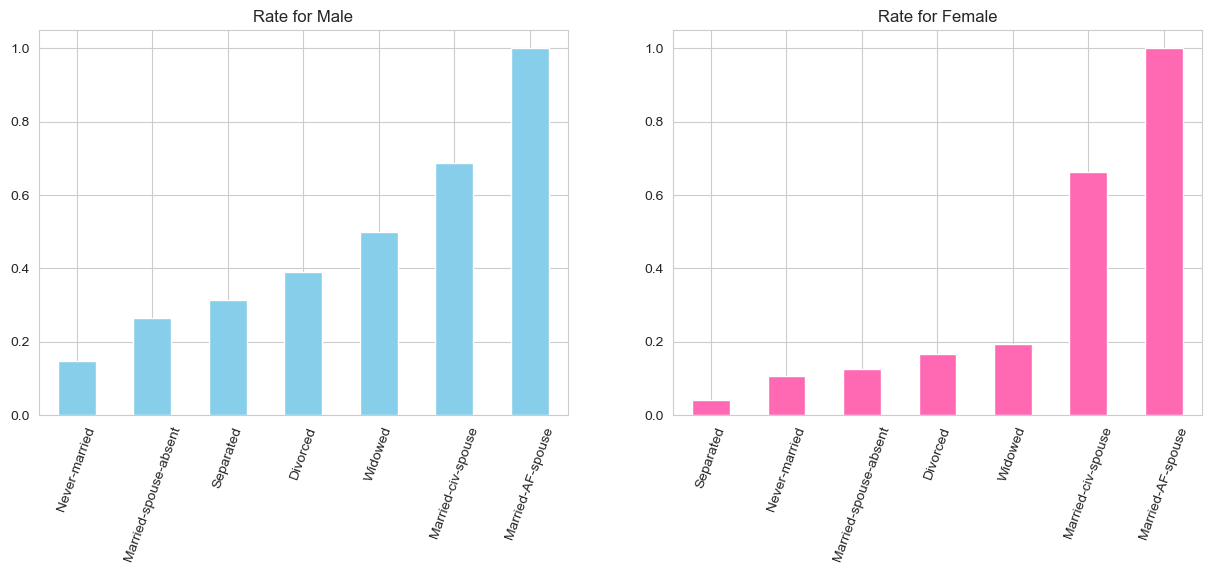

In [60]:

maritalStatusF=ds[ds['gender']=='Female'].groupby(['marital-status','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Female'][['age','educational-num','hours-per-week','marital-status']].groupby('marital-status').mean())
maritalStatusF['rate']=maritalStatusF['>50K']/(maritalStatusF['>50K'] + maritalStatusF['<=50K'])
maritalStatusF=maritalStatusF.sort_values(by='rate',ascending=False)
maritalStatusM=ds[ds['gender']=='Male'].groupby(['marital-status','income']).size().unstack().fillna(0).join(ds[ds['gender']=='Male'][['age','educational-num','hours-per-week','marital-status']].groupby('marital-status').mean())
maritalStatusM['rate']=maritalStatusM['>50K']/(maritalStatusM['>50K'] + maritalStatusM['<=50K'])
maritalStatusM=maritalStatusM.sort_values(by='rate',ascending=False)
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
maritalStatusM['rate'].sort_values().plot.bar(color='skyblue')
plt.title('Rate for Male')
plt.xlabel('')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
maritalStatusF['rate'].sort_values().plot.bar(color='hotpink')
plt.title('Rate for Female')
plt.xlabel('');
plt.xticks(rotation=70);

In [61]:
maritalStatusF

,<=50K,>50K,age,educational-num,hours-per-week,rate
marital-status,,,,,,
Married-AF-spouse,0.0,3.0,32.333333,11.666667,40.666667,1.000000
Married-civ-spouse,77.0,151.0,39.464912,10.938596,37.206140,0.662281
Widowed,46.0,11.0,56.175439,9.403509,34.491228,0.192982
Divorced,197.0,39.0,43.084746,10.296610,40.576271,0.165254
Married-spouse-absent,14.0,2.0,38.687500,8.812500,35.500000,0.125000
Never-married,341.0,40.0,29.559055,10.503937,35.587927,0.104987
Separated,46.0,2.0,42.000000,9.729167,39.291667,0.041667


In [62]:
maritalStatusM

,<=50K,>50K,age,educational-num,hours-per-week,rate
marital-status,,,,,,
Married-AF-spouse,0.0,1.0,27.000000,9.000000,40.000000,1.000000
Married-civ-spouse,590.0,1297.0,43.614732,10.820880,45.201378,0.687334
Widowed,5.0,5.0,57.500000,10.700000,37.500000,0.500000
Divorced,107.0,68.0,43.685714,10.554286,44.651429,0.388571
Separated,24.0,11.0,39.428571,9.828571,44.914286,0.314286
Married-spouse-absent,14.0,5.0,41.789474,9.473684,45.210526,0.263158
Never-married,439.0,75.0,29.046693,10.085603,39.801556,0.145914


###
> ### **outComes:**
>   **note:***this info is not generlized and it's just based on the current data*
>- **"Married-AF-spouse/Married-civ-spouse"** 
>   - most of them got Some collage or more
>   - has the highest rate of getting >50K higher than **68%**
>   - ***"Married-AF-spouse" :***  
>        - has the highest rate of all of the data set making **100%**
>        - but there are only "4" people under this class which making it untrusted enough  
>- **"Widowed","Divorced","Separated","Married-spouse-absent",and "Never-married"** :
>   - most of them got high-school or more
>   -  *"Never-married"* has the lowest rate(12%)
>- we can see a clear difference between married and non married indiviuals
>- ### based on gender:
>   - **women** :<br>
>        - there are a really small differences but in general *Female income based on the maritual-status is as high as the Males*
>   - **men** :<br>
>        - for marrid men ("Widowed") has a 50% chance of gitting >50K yearly :
>           - but this is conflecting with the original data(male and females together)
>           - only 10 male indiviuals in the data_set are "Widowed" so we can't generlize that for all "Widowed" men


### actions to take :
> - since the 'relationship' and 'marital-status' are the same information but in different words 
> - when making the model we can reduce the information by :
>   - drop the column "marital-status"
>   - reform the 'relationship' column to present (if married) by :
>       - taking married indivuals ("wife"/"husband") as a class represented by the value "1"
>       - while others are represented by "0"


In [63]:
ds.drop('marital-status',axis=1,inplace=True)

In [64]:
def relaCod(x):
    if (x=="Wife")or(x=="Husband"):
        return(1)
    return(0)

ds['relationship']=ds['relationship'].apply(lambda y: relaCod(y))


In [65]:
ds['relationship'].value_counts()

1    2090
0    1520
Name: relationship, dtype: int64

# **Making the AI Model**
<div class="alert-block alert-info">
</div>

In [66]:
ds

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
0,39,Private,13,Sales,1,White,Male,50,United-States,>50K
1,45,Self-emp-not-inc,13,Exec-managerial,1,White,Male,50,United-States,>50K
2,43,Private,13,Prof-specialty,1,White,Male,50,United-States,>50K
3,26,Private,13,Craft-repair,1,White,Male,40,United-States,>50K
4,36,Private,9,Sales,1,White,Male,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...
3798,32,Private,14,Tech-support,0,Asian-Pac-Islander,Male,11,Taiwan,<=50K
3799,22,Private,10,Protective-serv,0,White,Male,40,United-States,<=50K
3800,27,Private,12,Tech-support,1,White,Female,38,United-States,<=50K
3801,58,Private,9,Adm-clerical,0,White,Female,40,United-States,<=50K


## **Transform Data type:**

In [67]:
ds['workclass']=ds['workclass'].apply(lambda x: list(ds['workclass'].unique()).index(x)+1)
ds['occupation']=ds['occupation'].apply(lambda x: list(ds['occupation'].unique()).index(x)+1)
ds['race']=ds['race'].apply(lambda x: list(ds['race'].unique()).index(x)+1)
ds['native-country']=ds['native-country'].apply(lambda x: list(ds['native-country'].unique()).index(x)+1)

In [68]:
def TransformData(x):
    if x=="Male" or x==">50K":
        return(1)
    if x=="Female" or x=="<=50K":
        return(0)
ds['income']=ds['income'].apply(lambda x :TransformData(x))
ds['gender']=ds['gender'].apply(lambda x :TransformData(x))

In [69]:
ds.head()

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
0,39,1,13,1,1,1,1,50,1,1
1,45,2,13,2,1,1,1,50,1,1
2,43,1,13,3,1,1,1,50,1,1
3,26,1,13,4,1,1,1,40,1,1
4,36,1,9,1,1,1,1,50,1,1


## **correlation after transform data types**

In [70]:
ds.corr()

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
age,1.000000,0.176192,0.101284,-0.178911,0.321839,-0.079054,0.115204,0.103384,0.002506,0.292770
workclass,0.176192,1.000000,0.169860,-0.097003,0.108145,0.014746,0.046105,0.086165,-0.059699,0.163690
educational-num,0.101284,0.169860,1.000000,-0.387210,0.127258,-0.098317,0.035164,0.195010,-0.109463,0.375456
occupation,-0.178911,-0.097003,-0.387210,1.000000,-0.211644,0.137401,-0.088254,-0.196489,0.088856,-0.318307
relationship,0.321839,0.108145,0.127258,-0.211644,1.000000,-0.122930,0.434270,0.213210,-0.025184,0.510145
race,-0.079054,0.014746,-0.098317,0.137401,-0.122930,1.000000,-0.113833,-0.057932,0.085042,-0.121083
gender,0.115204,0.046105,0.035164,-0.088254,0.434270,-0.113833,1.000000,0.253948,-0.031182,0.264161
hours-per-week,0.103384,0.086165,0.195010,-0.196489,0.213210,-0.057932,0.253948,1.000000,-0.014362,0.264204
native-country,0.002506,-0.059699,-0.109463,0.088856,-0.025184,0.085042,-0.031182,-0.014362,1.000000,-0.063718
income,0.292770,0.163690,0.375456,-0.318307,0.510145,-0.121083,0.264161,0.264204,-0.063718,1.000000


In [71]:
ds.describe()

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000
mean,39.893075,1.757064,10.580332,4.908310,0.578947,1.235734,0.731579,42.263989,2.168144,0.473684
std,12.451276,1.404772,2.619661,3.307156,0.493796,0.678693,0.443199,11.801834,4.733079,0.499376
min,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000
25%,30.000000,1.000000,9.000000,2.000000,0.000000,1.000000,0.000000,40.000000,1.000000,0.000000
50%,39.000000,1.000000,10.000000,4.000000,1.000000,1.000000,1.000000,40.000000,1.000000,0.000000
75%,48.000000,2.000000,13.000000,7.000000,1.000000,1.000000,1.000000,48.750000,1.000000,1.000000
max,90.000000,7.000000,16.000000,14.000000,1.000000,5.000000,1.000000,99.000000,37.000000,1.000000


## **Random Sampling**
- this data set was devided : the first half was >50K the other was <=50K
,so we have to mix these tow togather to be ready for the next step

In [72]:
sampler = np.random.permutation(3610)
sampler

array([3199, 2538,   10, ..., 1485,  743, 3121])

In [73]:
ds=ds.take(sampler)
ds

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
3362,26,1,9,11,0,1,1,40,1,0
2640,34,1,3,10,1,1,1,40,16,0
10,30,1,13,1,1,1,1,55,1,1
3605,41,1,10,8,0,1,1,40,21,0
2803,35,1,9,12,0,1,1,40,1,0
...,...,...,...,...,...,...,...,...,...,...
3682,20,1,10,6,0,1,0,40,1,0
2618,44,1,9,6,0,1,0,43,1,0
1524,58,1,12,2,1,1,1,50,1,1
765,40,1,9,6,1,1,0,46,1,1


## **Split the dataSet**

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(ds,ds['income'],test_size=0.25,random_state=0)

In [76]:
y_train

2793    0
1559    1
2748    0
1869    0
2907    0
       ..
3045    0
2375    0
39      1
1575    1
1612    1
Name: income, Length: 2707, dtype: int64

In [77]:
x_test

,age,workclass,educational-num,occupation,relationship,race,gender,hours-per-week,native-country,income
1588,47,1,10,2,1,1,1,40,1,1
2187,19,3,10,3,0,1,1,40,1,0
2263,34,1,10,1,0,3,0,35,1,0
2534,46,1,13,1,1,1,1,48,1,0
1705,31,5,13,2,1,1,1,55,1,1
...,...,...,...,...,...,...,...,...,...,...
3008,32,6,11,9,0,3,1,40,1,0
2369,29,1,13,6,0,1,0,40,1,0
1011,63,2,4,10,1,1,1,60,1,1
2790,31,1,9,4,1,1,1,40,1,0


## **KNN**

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [79]:
n=0
acc=0
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train.drop(['income'],axis=1),y_train)
    y_pred=knn.predict(x_test.drop(['income'],axis=1))
    c=metrics.accuracy_score(y_test,y_pred)
    if c>acc:
        n=i
        acc=c
print(n,acc)
    


31 0.7475083056478405


In [80]:
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train.drop(['income'],axis=1),y_train)
y_pred=knn.predict(x_test.drop(['income'],axis=1))
# ----------------------------------------

### **classification report:**

In [81]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print('confusion Matrix: \n',metrics.confusion_matrix(y_test,y_pred))
print('classification Report: \n',metrics.classification_report(y_test,y_pred))

Accuracy:  0.7475083056478405
confusion Matrix: 
 [[328 133]
 [ 95 347]]
classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       461
           1       0.72      0.79      0.75       442

    accuracy                           0.75       903
   macro avg       0.75      0.75      0.75       903
weighted avg       0.75      0.75      0.75       903



## **NaiveBayas**

In [82]:
from sklearn.naive_bayes import GaussianNB as gnb

In [83]:
GNBmodel = gnb()
GNBmodel.fit(x_train.drop(['income'],axis=1),y_train)
predict=GNBmodel.predict(x_test.drop(['income'],axis=1))


### **classification report:**

In [84]:
print("Accuracy: ",metrics.accuracy_score(y_test,predict))
print('confusion Matrix: \n',metrics.confusion_matrix(y_test,predict))
print('classification Report: \n',metrics.classification_report(y_test,predict))

Accuracy:  0.7685492801771872
confusion Matrix: 
 [[332 129]
 [ 80 362]]
classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       461
           1       0.74      0.82      0.78       442

    accuracy                           0.77       903
   macro avg       0.77      0.77      0.77       903
weighted avg       0.77      0.77      0.77       903



## **DecisionTreeClassifier**

In [85]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [86]:
dtmodel=DTC(random_state=150)
dtmodel.fit(x_train.drop(['income'],axis=1),y_train)
predict=dtmodel.predict(x_test.drop(['income'],axis=1))

In [87]:
print("Accuracy: ",metrics.accuracy_score(y_test,predict))
print('confusion Matrix: \n',metrics.confusion_matrix(y_test,predict))
print('classification Report: \n',metrics.classification_report(y_test,predict))

Accuracy:  0.7264673311184939
confusion Matrix: 
 [[327 134]
 [113 329]]
classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       461
           1       0.71      0.74      0.73       442

    accuracy                           0.73       903
   macro avg       0.73      0.73      0.73       903
weighted avg       0.73      0.73      0.73       903



## **trying them out:**

In [89]:

dic={'age':[30],
 'workclass':[1],
 'educational-num':[13],
 'occupation':[5],
 'relationship':[0],
 'race':[1],
 'gender':[0],
 'hours-per-week':[35],
 'native-country':[1]}

# sample=np.array([40,1,13,5,0,1,1,40,1]).reshape(1, -1)
sample=pd.DataFrame(dic)
knn_pred=knn.predict(sample)
Naivepred=GNBmodel.predict(sample)
Dtreepred=dtmodel.predict(sample)
print("",knn_pred,"\n",Naivepred,"\n",Dtreepred,"\n")

 [0] 
 [0] 
 [0] 

